In [2]:
import pandas as pd
dataset = pd.read_csv('Sample.csv')
dataset.describe()

,user_id,0_glove,1_glove,2_glove,3_glove,4_glove,5_glove,6_glove,7_glove,8_glove,...,290_glove,291_glove,292_glove,293_glove,294_glove,295_glove,296_glove,297_glove,298_glove,299_glove
count,26837.000000,26837.000000,26837.000000,26837.000000,26837.000000,26837.000000,26837.000000,26837.000000,26837.000000,26837.000000,...,26837.000000,26837.000000,26837.000000,26837.000000,26837.000000,26837.000000,26837.000000,26837.000000,26837.000000,26837.000000
mean,39042.268733,-0.043769,0.134905,-0.120947,-0.012707,0.080289,-0.050088,0.015338,-0.096046,0.008609,...,-0.128524,0.028495,-0.022749,-0.086131,0.092448,-0.034628,-0.049818,-0.050759,0.019770,0.099494
std,22427.731920,0.029829,0.031810,0.066214,0.031666,0.026082,0.026678,0.028459,0.050788,0.025153,...,0.054175,0.026683,0.038298,0.025203,0.055290,0.025561,0.028810,0.027599,0.039579,0.026897
min,0.000000,-0.451733,-0.300470,-0.590280,-0.578614,-0.311477,-0.287366,-0.315483,-0.559423,-0.331311,...,-0.310230,-0.426425,-0.354701,-0.261722,-0.200969,-0.449997,-0.711770,-0.526994,-0.422442,-0.290670
25%,19603.000000,-0.061862,0.121735,-0.171336,-0.032965,0.065338,-0.064934,0.001468,-0.133169,-0.004402,...,-0.158778,0.016614,-0.046260,-0.101489,0.064410,-0.047195,-0.065093,-0.063554,-0.002729,0.086299
50%,39015.000000,-0.046072,0.136630,-0.122761,-0.012333,0.079504,-0.047745,0.013844,-0.093519,0.004924,...,-0.136821,0.032010,-0.024076,-0.087211,0.089481,-0.032853,-0.052869,-0.051629,0.022936,0.101948
75%,58402.000000,-0.028563,0.150864,-0.077242,0.006986,0.093724,-0.033941,0.026995,-0.062224,0.017378,...,-0.110234,0.043582,0.001804,-0.072598,0.113440,-0.019482,-0.038136,-0.038891,0.046641,0.115881
max,78056.000000,0.318384,0.591940,0.510467,0.339891,0.778995,0.391332,0.471844,0.195430,0.405964,...,0.497733,0.472880,0.494396,0.239153,0.884176,0.198281,0.335709,0.334103,0.205380,0.465744


In [3]:
# There is no empty NA value in the dataframe
dataset.isna().sum().sum()

0

In [4]:
# creating numbers for the hate column because they are in characters
def conversion(C):
    if   C == 'normal':
        return 0
    elif C == 'other':
        return 1
    elif C == 'hateful':
        return 2

dataset['hate'] = dataset['hate'].apply(lambda x: conversion(x))


dataset.dropna()
# seperating the output label  
y = dataset['hate']

In [5]:
# as observed above you have a very large std and non centered mean
normalized_df=(dataset-dataset.mean())/dataset.std()

In [6]:
# showing description after normalization
normalized_df.describe()

,user_id,hate,0_glove,1_glove,2_glove,3_glove,4_glove,5_glove,6_glove,7_glove,...,290_glove,291_glove,292_glove,293_glove,294_glove,295_glove,296_glove,297_glove,298_glove,299_glove
count,2.683700e+04,2.683700e+04,2.683700e+04,2.683700e+04,2.683700e+04,2.683700e+04,2.683700e+04,2.683700e+04,2.683700e+04,2.683700e+04,...,2.683700e+04,2.683700e+04,2.683700e+04,2.683700e+04,2.683700e+04,2.683700e+04,2.683700e+04,2.683700e+04,2.683700e+04,2.683700e+04
mean,-3.950850e-15,4.159748e-16,4.105413e-15,2.340975e-15,-6.169840e-15,2.577391e-15,-1.279758e-14,-2.762441e-15,-1.948378e-15,1.390553e-14,...,1.153821e-14,2.538719e-16,3.218588e-15,2.237007e-14,5.488275e-16,-2.502174e-15,-1.989813e-15,-1.673738e-15,2.216011e-15,1.972985e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.740803e+00,-2.514289e+00,-1.367688e+01,-1.368683e+01,-7.088108e+00,-1.787097e+01,-1.502036e+01,-8.894115e+00,-1.162459e+01,-9.123763e+00,...,-3.354059e+00,-1.704881e+01,-8.667701e+00,-6.966994e+00,-5.306843e+00,-1.625034e+01,-2.297674e+01,-1.725557e+01,-1.117303e+01,-1.450592e+01
25%,-8.667514e-01,2.987337e-01,-6.065681e-01,-4.140006e-01,-7.609931e-01,-6.397294e-01,-5.732101e-01,-5.564833e-01,-4.873592e-01,-7.309469e-01,...,-5.584490e-01,-4.452415e-01,-6.139057e-01,-6.093548e-01,-5.071122e-01,-4.916299e-01,-5.302086e-01,-4.636287e-01,-5.684678e-01,-4.905907e-01
50%,-1.215849e-03,2.987337e-01,-7.721336e-02,5.423867e-02,-2.739146e-02,1.180256e-02,-3.007558e-02,8.781445e-02,-5.248225e-02,4.975192e-02,...,-1.531550e-01,1.317251e-01,-3.464516e-02,-4.285174e-02,-5.366251e-02,6.945936e-02,-1.059186e-01,-3.155418e-02,7.998245e-02,9.121127e-02
75%,8.632050e-01,2.987337e-01,5.097560e-01,5.017243e-01,6.600666e-01,6.218986e-01,5.151223e-01,6.052317e-01,4.096398e-01,6.659437e-01,...,3.376055e-01,5.654145e-01,6.411081e-01,5.369448e-01,3.796628e-01,5.925630e-01,4.054717e-01,4.299990e-01,6.789296e-01,6.092514e-01
max,1.739531e+00,3.111756e+00,1.214107e+01,1.436778e+01,9.535949e+00,1.113481e+01,2.678852e+01,1.654609e+01,1.604100e+01,5.739072e+00,...,1.155988e+01,1.665400e+01,1.350331e+01,1.290644e+01,1.431946e+01,9.112063e+00,1.338186e+01,1.394480e+01,4.689651e+00,1.361677e+01


In [7]:
normalized_df.head()
# visualizing new normalized dataframe

,user_id,hate,0_glove,1_glove,2_glove,3_glove,4_glove,5_glove,6_glove,7_glove,...,290_glove,291_glove,292_glove,293_glove,294_glove,295_glove,296_glove,297_glove,298_glove,299_glove
0,-1.740803,-2.514289,-0.939931,-0.877920,-0.840523,-1.336038,-0.008899,0.379459,0.334707,0.165014,...,-0.632751,-0.233026,-1.018105,-0.896923,0.051523,1.904339,-1.018878,-0.480998,0.500350,0.820431
1,-1.740536,0.298734,-0.731225,0.391070,-0.471227,-0.439207,-1.257954,-0.013352,-1.163117,0.527869,...,-1.070257,1.403969,-0.360452,-0.224803,0.044652,-0.084807,-1.350180,-0.427542,1.084294,0.692947
2,-1.740491,0.298734,0.512255,0.106968,-0.009899,-0.852498,-0.037148,0.613060,-0.422372,0.321777,...,-1.008244,0.823589,0.496396,0.644400,-0.111999,0.407457,-0.519628,-0.230884,0.524971,0.699264
3,-1.740268,0.298734,0.165550,-0.154358,1.353409,0.733883,0.226016,-0.391391,0.738488,-0.653130,...,1.820542,-1.820720,-1.614619,-1.068628,0.147136,-0.746412,0.668360,1.329195,-1.396143,-0.028197
4,-1.740179,0.298734,-1.493923,-0.202592,0.770610,0.771249,-1.267193,0.186539,-0.174576,0.356403,...,0.189435,0.379997,-0.075471,0.579977,0.011884,-0.535536,0.895182,0.433432,-0.520177,-0.166643


In [8]:
# removing hate and user_id label from the input
normalized_df = normalized_df.drop(['hate','user_id'], 1)
normalized_df.head()

,0_glove,1_glove,2_glove,3_glove,4_glove,5_glove,6_glove,7_glove,8_glove,9_glove,...,290_glove,291_glove,292_glove,293_glove,294_glove,295_glove,296_glove,297_glove,298_glove,299_glove
0,-0.939931,-0.877920,-0.840523,-1.336038,-0.008899,0.379459,0.334707,0.165014,-0.702868,0.504444,...,-0.632751,-0.233026,-1.018105,-0.896923,0.051523,1.904339,-1.018878,-0.480998,0.500350,0.820431
1,-0.731225,0.391070,-0.471227,-0.439207,-1.257954,-0.013352,-1.163117,0.527869,-0.140084,1.106989,...,-1.070257,1.403969,-0.360452,-0.224803,0.044652,-0.084807,-1.350180,-0.427542,1.084294,0.692947
2,0.512255,0.106968,-0.009899,-0.852498,-0.037148,0.613060,-0.422372,0.321777,-0.248706,0.685715,...,-1.008244,0.823589,0.496396,0.644400,-0.111999,0.407457,-0.519628,-0.230884,0.524971,0.699264
3,0.165550,-0.154358,1.353409,0.733883,0.226016,-0.391391,0.738488,-0.653130,0.846391,-1.240303,...,1.820542,-1.820720,-1.614619,-1.068628,0.147136,-0.746412,0.668360,1.329195,-1.396143,-0.028197
4,-1.493923,-0.202592,0.770610,0.771249,-1.267193,0.186539,-0.174576,0.356403,-0.038135,0.204087,...,0.189435,0.379997,-0.075471,0.579977,0.011884,-0.535536,0.895182,0.433432,-0.520177,-0.166643


In [9]:
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# confusion matrix to be plotted from reults of algorithms
from sklearn.model_selection import train_test_split
# LETS TRAIN TEST SPLIT THE DATASET
# lets create pair of inputs and outputs for training
x1train, x1test, y1train, y1test = train_test_split(normalized_df,y, test_size = 0.2, random_state=1)
# convering to numpy array for the training process
x1train.values
y1train.values
x1test.values
y1test.values

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x1train, y1train)
# Now get the score using score method
print('The score on TEST DATA with KNN classifier and 3 neighbours') 
print(knn.score(x1test, y1test))
y_pred = knn.predict(x1test)
print(confusion_matrix(y1test, y_pred))
print(classification_report(y1test, y_pred, target_names=['normal','other','hateful']))

The score on TEST DATA with KNN classifier and 3 neighbours
0.8235842026825634
[[  61  579    5]
 [ 295 4337   13]
 [  21   34   23]]
              precision    recall  f1-score   support

      normal       0.16      0.09      0.12       645
       other       0.88      0.93      0.90      4645
     hateful       0.56      0.29      0.39        78

    accuracy                           0.82      5368
   macro avg       0.53      0.44      0.47      5368
weighted avg       0.79      0.82      0.80      5368



In [40]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x1train, y1train)
# Now get the score using score method
print('The score on TEST DATA with KNN classifier and 4 neighbours') 
print(knn.score(x1test, y1test))
y_pred = knn.predict(x1test)
print(confusion_matrix(y1test, y_pred))
print(classification_report(y1test, y_pred, target_names=['normal','other','hateful']))

The score on TEST DATA with KNN classifier and 4 neighbours
0.8019746646795827
[[ 100  539    6]
 [ 455 4181    9]
 [  16   38   24]]
              precision    recall  f1-score   support

      normal       0.18      0.16      0.16       645
       other       0.88      0.90      0.89      4645
     hateful       0.62      0.31      0.41        78

    accuracy                           0.80      5368
   macro avg       0.56      0.45      0.49      5368
weighted avg       0.79      0.80      0.80      5368



In [41]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x1train,y1train)
print('The SCORE on Test data with SVM ')
print(clf.score(x1test,y1test))
y_pred = clf.predict(x1test)
print(confusion_matrix(y1test, y_pred))
print(classification_report(y1test, y_pred, target_names=['normal','other','hateful']))

The SCORE on Test data with SVM 
0.8668032786885246
[[   0  645    0]
 [   1 4643    1]
 [   0   68   10]]
              precision    recall  f1-score   support

      normal       0.00      0.00      0.00       645
       other       0.87      1.00      0.93      4645
     hateful       0.91      0.13      0.22        78

    accuracy                           0.87      5368
   macro avg       0.59      0.38      0.38      5368
weighted avg       0.76      0.87      0.81      5368



In [42]:
# SVM with linear kernel
from sklearn.svm import LinearSVC 

lin_clf = LinearSVC()
lin_clf.fit(x1train,y1train)
print('The test score on TEST data with linear kernel SVM ')
print(lin_clf.score(x1test,y1test))
y_pred = lin_clf.predict(x1test)
print(confusion_matrix(y1test, y_pred))
print(classification_report(y1test, y_pred, target_names=['normal','other','hateful']))

The test score on TEST data with linear kernel SVM 
0.8666169895678092
[[   4  641    0]
 [   6 4635    4]
 [   0   65   13]]
              precision    recall  f1-score   support

      normal       0.40      0.01      0.01       645
       other       0.87      1.00      0.93      4645
     hateful       0.76      0.17      0.27        78

    accuracy                           0.87      5368
   macro avg       0.68      0.39      0.40      5368
weighted avg       0.81      0.87      0.81      5368



C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [39]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x1train,y1train)
print('The score on TEST data with Decision Tree classifier  ')
print(clf.score(x1test,y1test))
y_pred = clf.predict(x1test)
print(confusion_matrix(y1test, y_pred))
print(classification_report(y1test, y_pred, target_names=['normal','other','hateful']))

The score on TEST data with Decision Tree classifier  
0.7451564828614009
[[ 109  525   11]
 [ 684 3878   83]
 [  14   51   13]]
              precision    recall  f1-score   support

      normal       0.14      0.17      0.15       645
       other       0.87      0.83      0.85      4645
     hateful       0.12      0.17      0.14        78

    accuracy                           0.75      5368
   macro avg       0.38      0.39      0.38      5368
weighted avg       0.77      0.75      0.76      5368



In [43]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-4,
                     hidden_layer_sizes=(1300,),max_iter=20, random_state=1)

clf.fit(x1train,y1train)
print('The accurcay on the test data with MLP is')
print(clf.score(x1test,y1test))
y_pred = clf.predict(x1test)
print(confusion_matrix(y1test, y_pred))
print(classification_report(y1test, y_pred, target_names=['normal','other','hateful']))

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


The accurcay on the test data with MLP is
0.8673621460506706
[[  10  626    9]
 [  10 4619   16]
 [   4   47   27]]
              precision    recall  f1-score   support

      normal       0.42      0.02      0.03       645
       other       0.87      0.99      0.93      4645
     hateful       0.52      0.35      0.42        78

    accuracy                           0.87      5368
   macro avg       0.60      0.45      0.46      5368
weighted avg       0.81      0.87      0.81      5368



In [10]:
# LDA ANALYSIS TO GET NEW SET OF FEATURES FOR A BETTER CLASSIFICATION RESULTS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# define transform
lda = LinearDiscriminantAnalysis(n_components=2)
# prepare transform on dataset
lda.fit(x1train,y1train)
# apply transform to dataset
transformed = lda.transform(x1train)
transformed_test = lda.transform(x1test)

In [47]:
# tHESE ARE THE RESULTS OF KNN AFTER LINEAR DISCRIMINTORY ANALYSIS
# Not a significant improvment is observed so not adopting any LDA technique
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(transformed, y1train)
# Now get the score using score method
print('The score on TEST DATA with KNN classifier and 3 neighbours') 
print(knn.score(transformed_test, y1test))
y_pred = knn.predict(transformed_test)
print(confusion_matrix(y1test, y_pred))
print(classification_report(y1test, y_pred, target_names=['normal','other','hateful']))

The score on TEST DATA with KNN classifier and 3 neighbours
0.8284277198211625
[[  55  586    4]
 [ 256 4373   16]
 [  12   47   19]]
              precision    recall  f1-score   support

      normal       0.17      0.09      0.11       645
       other       0.87      0.94      0.91      4645
     hateful       0.49      0.24      0.32        78

    accuracy                           0.83      5368
   macro avg       0.51      0.42      0.45      5368
weighted avg       0.78      0.83      0.80      5368



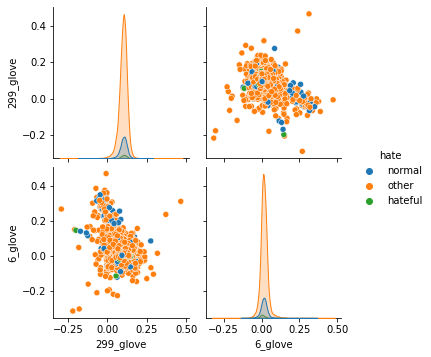

In [6]:
import seaborn as sns
sns.pairplot(dataset, hue="hate",kind = 'scatter',vars=['299_glove','6_glove'])

In [15]:
from sklearn.cluster import SpectralClustering
import numpy as np
clustering = SpectralClustering(n_clusters=3,
           assign_labels="discretize",
           random_state=0)
clustering.fit(transformed,y1train)

SpectralClustering(assign_labels='discretize', n_clusters=3, random_state=0)

              precision    recall  f1-score   support

      normal       0.12      1.00      0.22      2627
       other       1.00      0.00      0.00     18498
     hateful       0.00      0.00      0.00       344

    accuracy                           0.12     21469
   macro avg       0.37      0.33      0.07     21469
weighted avg       0.88      0.12      0.03     21469



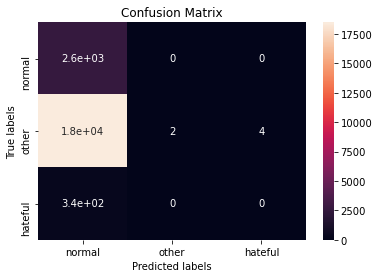

In [16]:
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt     

y_pred = clustering.labels_.astype(np.int)
cm = confusion_matrix(y1train, y_pred)
print(classification_report(y1train, y_pred, target_names=['normal','other','hateful']))


ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['normal','other','hateful']); ax.yaxis.set_ticklabels(['normal','other','hateful']);
plt.show()



In [17]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=3, random_state=0).fit(transformed,y1train)
y_pred = kmeans.labels_

              precision    recall  f1-score   support

      normal       0.17      0.58      0.27      2627
       other       0.92      0.54      0.68     18498
     hateful       0.13      0.74      0.22       344

    accuracy                           0.54     21469
   macro avg       0.41      0.62      0.39     21469
weighted avg       0.82      0.54      0.62     21469



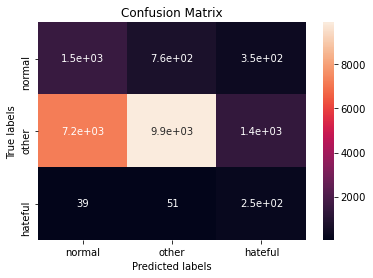

In [18]:
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt     

cm = confusion_matrix(y1train, y_pred)
print(classification_report(y1train, y_pred, target_names=['normal','other','hateful']))


ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['normal','other','hateful']); ax.yaxis.set_ticklabels(['normal','other','hateful']);
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

clustering = DBSCAN(eps=3, min_samples=2).fit(transformed,y1train)
y_pred = clustering.labels_


